### Ensemble learning is technique that where weak models are trained on data and then combind to make a single strong model 

In [12]:
%pip install kagglehub pandas scikit-learn numpy seaborn

  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.1-cp314-cp314-win_amd64.whl.metadata (6.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 15.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.8 MB/s  0:00:00
Using cached numpy-2.4.1-cp314-cp314-win_amd64.whl (12.4 MB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.3 MB 16.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.3 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 14.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")

In [13]:
import pandas as pd
print("Path to dataset files:", path)

Path to dataset files: C:\Users\sshadmin\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [16]:
titanic = pd.read_csv(path + "/Titanic-Dataset.csv")

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 640x480 with 0 Axes>

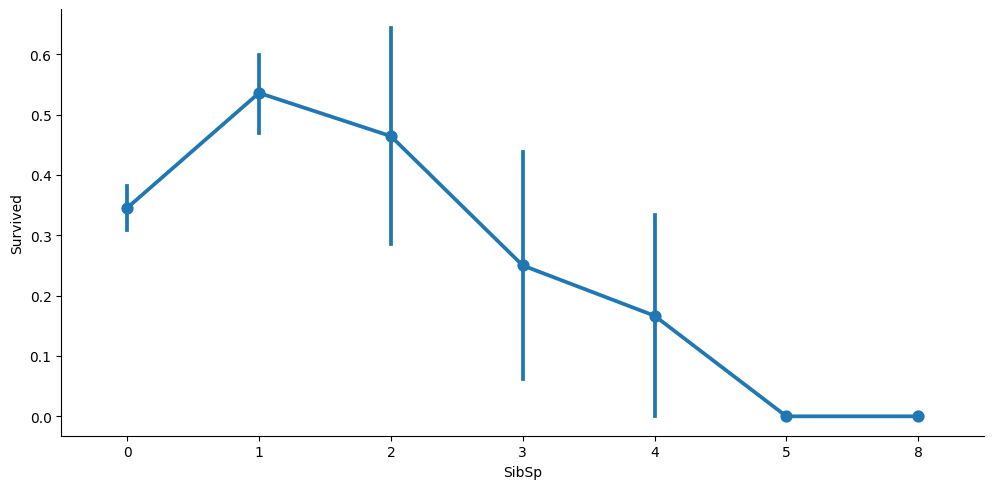

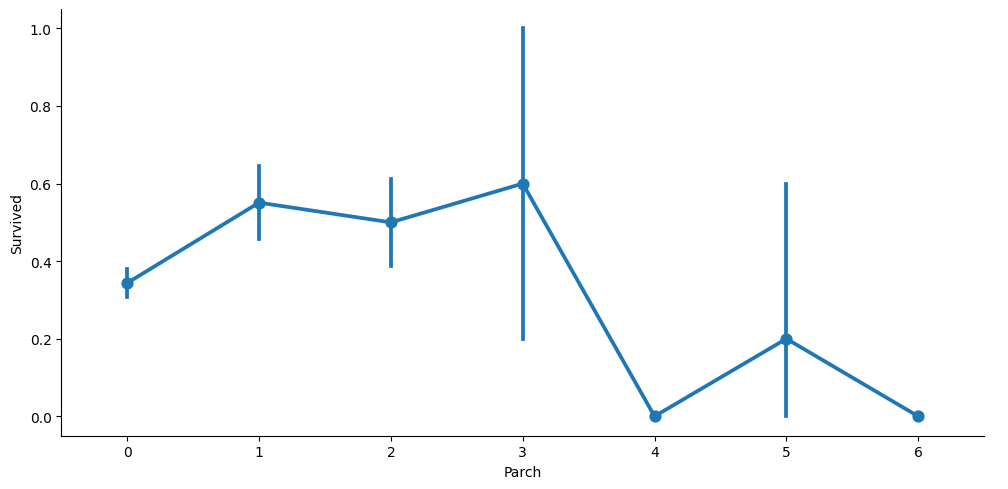

In [21]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = titanic, kind = 'point', aspect= 2,)

In [22]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
titanic.drop(['SibSp', 'PassengerId', 'Parch'], axis = 1, inplace = True)

In [25]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [26]:
titanic.select_dtypes(include = 'object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [27]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [28]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [29]:
pd.get_dummies(titanic['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [30]:
gender_num = {'male' : 0, 'female' : 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)


In [31]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [32]:
titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [33]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [34]:
#Splitting data

In [35]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

## Types of Ensemble Learning 

1. Boosting - Sequentially make the models learn from one after the another, then combined in summing or averaging process
2. Bagging - Parallel learning and then combined in deterministic way
3. Stacking - Sequential learning but the output of these models are used as input to a metamodel to generate final output

For boosting and bagging the type of the weaker models are the same and cannot be different, but for Stacking the models can be different

1. Boosting requires the weaker models to be low variance and high bias - the ensemble learning when the models are combined will handle to exclude the errors and make the model better
2. For Bagging, we generally consider overfit weaker models that have low bias but high variance making the total error high - the meta model will handle this for us 

## Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [37]:
AdaBoostClassifier().get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [38]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [39]:
gb = GradientBoostingClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [3, 5, 7, 9, 11],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv = 5)
cv.fit(X_train, y_train)
print_results(cv)

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.822 (+/-0.039) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}
0.815 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.818 (+/-0.04) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250}
0.794 (+/-0.016) for {'learning_ra

In [40]:
cv.best_estimator_

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.01
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",500
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

In [41]:
joblib.dump(cv.best_estimator_, './models/GB_model.pkl')

['./models/GB_model.pkl']

## Bagging

Random Forest is one of Bagging Method

In [42]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(X_train, y_train)

print_results(cv)

Best Params: {'max_depth': 4, 'n_estimators': 250}

0.811 (+/-0.046) for {'max_depth': 4, 'n_estimators': 5}
0.82 (+/-0.105) for {'max_depth': 4, 'n_estimators': 50}
0.83 (+/-0.11) for {'max_depth': 4, 'n_estimators': 250}
0.828 (+/-0.099) for {'max_depth': 4, 'n_estimators': 500}
0.807 (+/-0.079) for {'max_depth': 8, 'n_estimators': 5}
0.817 (+/-0.069) for {'max_depth': 8, 'n_estimators': 50}
0.817 (+/-0.072) for {'max_depth': 8, 'n_estimators': 250}
0.817 (+/-0.059) for {'max_depth': 8, 'n_estimators': 500}
0.8 (+/-0.044) for {'max_depth': 16, 'n_estimators': 5}
0.818 (+/-0.018) for {'max_depth': 16, 'n_estimators': 50}
0.813 (+/-0.031) for {'max_depth': 16, 'n_estimators': 250}
0.811 (+/-0.029) for {'max_depth': 16, 'n_estimators': 500}
0.785 (+/-0.052) for {'max_depth': 32, 'n_estimators': 5}
0.817 (+/-0.018) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+/-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.809 (+/-0.018) for {'max_depth': 32, 'n_estimators': 500}
0.803 (+/-0.0

In [44]:
cv.best_estimator_

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",250
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [45]:
joblib.dump(cv.best_estimator_, './models/RF_model.pkl')

['./models/RF_model.pkl']

## Stacking

In [47]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier

estimators = [('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier())]
StackingClassifier(estimators = estimators).get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'log_loss',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None

In [48]:
from sklearn.linear_model import LogisticRegression


In [49]:
sc = StackingClassifier(estimators = estimators)

In [50]:
sc.get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'log_loss',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None

In [51]:
parameters = {
    'gb__n_estimators' : [50, 100],
    'rf__n_estimators' : [50, 100],
    'final_estimator' : [LogisticRegression(C=0.1), LogisticRegression(C=1), LogisticRegression(C=10)],
    'passthrough' : [True, False]
}

cv = GridSearchCV(sc, parameters, cv = 5)
cv.fit(X_train, y_train)

print_results(cv)

C:\Users\sshadmin\Documents\AiGenAiLearnJourney\ailearnenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sshadmin\Documents\AiGenAiLearnJourney\ailearnenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https

Best Params: {'final_estimator': LogisticRegression(C=1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}

0.83 (+/-0.105) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 50}
0.828 (+/-0.102) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 100}
0.837 (+/-0.038) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}
0.837 (+/-0.027) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 100}
0.832 (+/-0.107) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 50}
0.832 (+/-0.109) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 100}
0.839 (+/-0.03) for {'final_estimator': Log

In [52]:
cv.best_estimator_

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('gb', ...), ('rf', ...)]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",LogisticRegression(C=1)
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting st

In [54]:
joblib.dump(cv.best_estimator_, './models/stacked_model.pkl')

['./models/stacked_model.pkl']

## Comparing all the three models

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [57]:
gb_mdl = joblib.load('./models/GB_model.pkl')
rf_mdl = joblib.load('./models/RF_model.pkl')
stacked_mdl = joblib.load('./models/stacked_model.pkl')

In [60]:
X_val.shape

(178, 6)

In [61]:
y_val.shape

(178,)

In [62]:
X_train.shape

(534, 6)

In [63]:
y_train.shape

(534,)

In [66]:
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency : {}ms'.format(str(model), accuracy, precision, recall, round((end - start) * 1000, 3)))

In [75]:
for mdl in [gb_mdl, rf_mdl, stacked_mdl]:
    evaluate_model(mdl, X_val, y_val)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500) -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency : 1.358ms
RandomForestClassifier(max_depth=4, n_estimators=250) -- Accuracy: 0.803 / Precision: 0.812 / Recall: 0.6 / Latency : 8.379ms
StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=50)),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression(C=1)) -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency : 2.965ms


In [76]:
evaluate_model(rf_mdl, X_test, y_test)

RandomForestClassifier(max_depth=4, n_estimators=250) -- Accuracy: 0.793 / Precision: 0.831 / Recall: 0.645 / Latency : 9.588ms


In [77]:
evaluate_model(gb_mdl, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500) -- Accuracy: 0.816 / Precision: 0.852 / Recall: 0.684 / Latency : 1.318ms


In [78]:
evaluate_model(stacked_mdl, X_test, y_test)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=50)),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression(C=1)) -- Accuracy: 0.821 / Precision: 0.867 / Recall: 0.684 / Latency : 3.632ms
